In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

643

In [6]:
# Import the requests library.
import requests

# Import the API key
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datatime library.
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nador
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | makkaveyevo
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | kruisfontein
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 10 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | karamken
City not found. Skipping...
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | grao mogol
Processing Record 16 of Set 1 | llanes
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | irbil
Processing Record 19 of Set 1 | kingston
Processing Record 20 of Set 1 | ilulissat
Pr

Processing Record 36 of Set 4 | la ronge
Processing Record 37 of Set 4 | zhigansk
Processing Record 38 of Set 4 | marsa matruh
Processing Record 39 of Set 4 | quchan
Processing Record 40 of Set 4 | gewane
Processing Record 41 of Set 4 | hasaki
Processing Record 42 of Set 4 | saleaula
City not found. Skipping...
Processing Record 43 of Set 4 | kahului
Processing Record 44 of Set 4 | gornopravdinsk
Processing Record 45 of Set 4 | renigunta
Processing Record 46 of Set 4 | hobyo
Processing Record 47 of Set 4 | havelock
Processing Record 48 of Set 4 | pergamino
Processing Record 49 of Set 4 | baykit
Processing Record 50 of Set 4 | longyearbyen
Processing Record 1 of Set 5 | smidovich
Processing Record 2 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 3 of Set 5 | ustka
Processing Record 4 of Set 5 | tual
Processing Record 5 of Set 5 | yarmouth
Processing Record 6 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 7 of Set 5 | parbhani
Processing Record 8 of Set 5 | rio 

Processing Record 24 of Set 8 | paamiut
Processing Record 25 of Set 8 | olinda
Processing Record 26 of Set 8 | margate
Processing Record 27 of Set 8 | araouane
Processing Record 28 of Set 8 | teknaf
Processing Record 29 of Set 8 | diego de almagro
Processing Record 30 of Set 8 | juegang
Processing Record 31 of Set 8 | ixtlan
Processing Record 32 of Set 8 | cermik
Processing Record 33 of Set 8 | basco
Processing Record 34 of Set 8 | poum
Processing Record 35 of Set 8 | markivka
Processing Record 36 of Set 8 | amga
Processing Record 37 of Set 8 | bismil
Processing Record 38 of Set 8 | pacasmayo
Processing Record 39 of Set 8 | normandin
Processing Record 40 of Set 8 | saint-augustin
Processing Record 41 of Set 8 | kijang
Processing Record 42 of Set 8 | bireun
Processing Record 43 of Set 8 | maniitsoq
Processing Record 44 of Set 8 | marawi
Processing Record 45 of Set 8 | adrar
Processing Record 46 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 47 of Set 8 | burnie
Proc

Processing Record 12 of Set 12 | muros
Processing Record 13 of Set 12 | cockburn town
Processing Record 14 of Set 12 | biak
Processing Record 15 of Set 12 | edson
Processing Record 16 of Set 12 | patacamaya
Processing Record 17 of Set 12 | zhanatas
City not found. Skipping...
Processing Record 18 of Set 12 | sydney
Processing Record 19 of Set 12 | luanda
Processing Record 20 of Set 12 | saryshagan
City not found. Skipping...
Processing Record 21 of Set 12 | kabanjahe
Processing Record 22 of Set 12 | clarence town
Processing Record 23 of Set 12 | bilibino
Processing Record 24 of Set 12 | letlhakeng
Processing Record 25 of Set 12 | inuvik
Processing Record 26 of Set 12 | waitati
Processing Record 27 of Set 12 | haines junction
Processing Record 28 of Set 12 | santa barbara
Processing Record 29 of Set 12 | kamina
Processing Record 30 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 31 of Set 12 | toamasina
Processing Record 32 of Set 12 | tongzhou
Processing Record 33 

In [10]:
len(city_data)

588

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nador,35.1740,-2.9287,57.45,41,0,4.61,MA,2022-02-04 02:43:04
1,Busselton,-33.6500,115.3333,98.04,33,57,15.95,AU,2022-02-04 02:43:05
2,Jamestown,42.0970,-79.2353,23.09,67,100,7.00,US,2022-02-04 02:41:12
3,Rikitea,-23.1203,-134.9692,78.08,74,100,18.41,PF,2022-02-04 02:38:46
4,Makkaveyevo,51.7533,113.9454,-10.48,81,54,3.94,RU,2022-02-04 02:43:05
5,Hithadhoo,-0.6000,73.0833,81.64,74,100,10.09,MV,2022-02-04 02:43:06
6,Kruisfontein,-34.0033,24.7314,64.89,75,74,9.53,ZA,2022-02-04 02:43:06
7,Butaritari,3.0707,172.7902,81.90,76,17,14.52,KI,2022-02-04 02:43:06
8,Ushuaia,-54.8000,-68.3000,42.46,70,75,23.02,AR,2022-02-04 02:42:37
9,Castro,-24.7911,-50.0119,64.47,98,100,5.01,BR,2022-02-04 02:42:32


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nador,MA,2022-02-04 02:43:04,35.1740,-2.9287,57.45,41,0,4.61
1,Busselton,AU,2022-02-04 02:43:05,-33.6500,115.3333,98.04,33,57,15.95
2,Jamestown,US,2022-02-04 02:41:12,42.0970,-79.2353,23.09,67,100,7.00
3,Rikitea,PF,2022-02-04 02:38:46,-23.1203,-134.9692,78.08,74,100,18.41
4,Makkaveyevo,RU,2022-02-04 02:43:05,51.7533,113.9454,-10.48,81,54,3.94
5,Hithadhoo,MV,2022-02-04 02:43:06,-0.6000,73.0833,81.64,74,100,10.09
6,Kruisfontein,ZA,2022-02-04 02:43:06,-34.0033,24.7314,64.89,75,74,9.53
7,Butaritari,KI,2022-02-04 02:43:06,3.0707,172.7902,81.90,76,17,14.52
8,Ushuaia,AR,2022-02-04 02:42:37,-54.8000,-68.3000,42.46,70,75,23.02
9,Castro,BR,2022-02-04 02:42:32,-24.7911,-50.0119,64.47,98,100,5.01


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

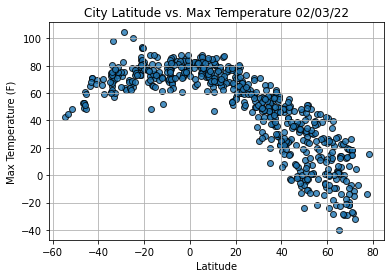

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs max temperature.
plt.scatter(lats, 
            max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

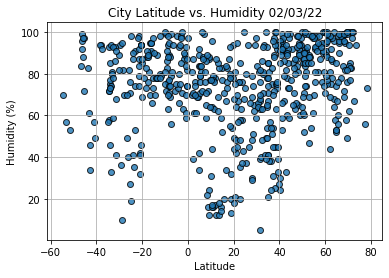

In [16]:
# Build the scatter plot for latitude vs max temperature.
plt.scatter(lats, 
            humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

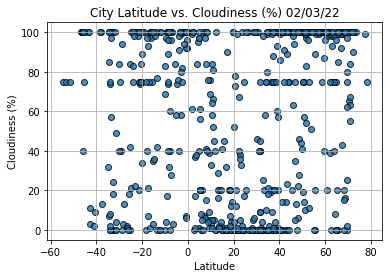

In [17]:
# Build the scatter plot for latitude vs max temperature.
plt.scatter(lats, 
            cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

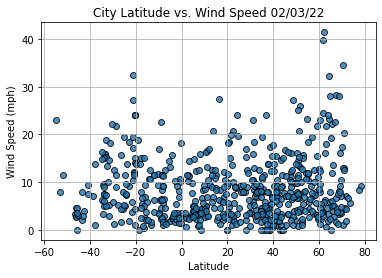

In [18]:
# Build the scatter plot for latitude vs max temperature.
plt.scatter(lats, 
            wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()